In [1]:
# Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Path of directory
drive_path = "/content/drive/MyDrive"
root_path = f"{drive_path}/master/code-data/mxene_solvent"
solvent_path = f"{drive_path}/master/code-data/solvent"

In [3]:
import pandas as pd

In [4]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/008_dataset_mx_solvent_using_polarity_index.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(444, 63)


,mx,method,solvent,label,inchikey,p,xe,xd,xn,gap_oh,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg
0,Ti3C2,HF,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,9.0,0.40,0.34,0.26,0.0,...,1,1,0,1,0,0,0,1,373.2,760.0
1,Ti3C2,HF,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,5.2,0.51,0.21,0.28,0.0,...,1,1,0,3,0,0,0,1,351.5,760.0
2,Ti3C2,HF,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,6.6,0.51,0.19,0.30,0.0,...,1,1,0,2,0,0,0,1,337.8,760.0
3,Ti3C2,HF,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,5.4,0.36,0.24,0.40,0.0,...,0,1,0,4,0,0,0,1,329.3,760.0
4,Ti3C2,HF,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,6.2,0.33,0.26,0.41,0.0,...,0,1,0,3,0,0,0,1,354.8,760.0


In [5]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [7]:
df_mx_solvent_data_labeled['method'] = df_mx_solvent_data_labeled['method'].astype('category').cat.codes

In [8]:
df_mx_solvent_data_labeled.head()

,mx,method,solvent,label,inchikey,p,xe,xd,xn,work_function_oh,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,Ti3C2,0,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,9.0,0.40,0.34,0.26,1.985656,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,Ti3C2,0,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,5.2,0.51,0.21,0.28,1.985656,...,46.07,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,Ti3C2,0,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,6.6,0.51,0.19,0.30,1.985656,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,Ti3C2,0,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,5.4,0.36,0.24,0.40,1.985656,...,58.08,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,Ti3C2,0,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,6.2,0.33,0.26,0.41,1.985656,...,41.05,0.0,23.8,29.3,0,1,0,3,0,354.8


In [29]:
features = ['method', 'p', 'xe', 'xd', 'xn','work_function_oh',
   'formation_energy_oh', 'ehull_oh', 'alphax_el_oh', 'alphay_el_oh', 'alphaz_el_oh',
   'plasmafrequency_x_oh', 'plasmafrequency_y_oh', 'has_inversion_symmetry_oh',
   'gap_o', 'work_function_o', 'formation_energy_o', 'ehull_o',
   'alphax_el_o', 'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o', 'plasmafrequency_y_o',
   'has_inversion_symmetry_o', 'work_function_f',
   'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f', 'alphaz_el_f', 'plasmafrequency_x_f',
   'plasmafrequency_y_f', 'has_inversion_symmetry_f',
   'molecular_weight', 'xlogp', 'tpsa', 'complexity', 'h_bond_donor_count', 'h_bond_acceptor_count',
   'rotatable_bond_count', 'heavy_atom_count', 'atom_stereo_count',
   'boiling_point']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [30]:
X.head()

,method,p,xe,xd,xn,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,0,9.0,0.40,0.34,0.26,1.985656,-1.294839,0.123329,32.369286,32.369286,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,0,5.2,0.51,0.21,0.28,1.985656,-1.294839,0.123329,32.369286,32.369286,...,46.07,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,0,6.6,0.51,0.19,0.30,1.985656,-1.294839,0.123329,32.369286,32.369286,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,0,5.4,0.36,0.24,0.40,1.985656,-1.294839,0.123329,32.369286,32.369286,...,58.08,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,0,6.2,0.33,0.26,0.41,1.985656,-1.294839,0.123329,32.369286,32.369286,...,41.05,0.0,23.8,29.3,0,1,0,3,0,354.8


In [31]:
y.head()

,label
0,1
1,1
2,-1
3,-1
4,-1


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [34]:
X_train = X_scaled[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [35]:
X_test = X_scaled[mask_unlabeled]
df_unlabeled = df_mx_solvent_data_labeled[mask_unlabeled].copy()

In [36]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [37]:
proba_unlabeled = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

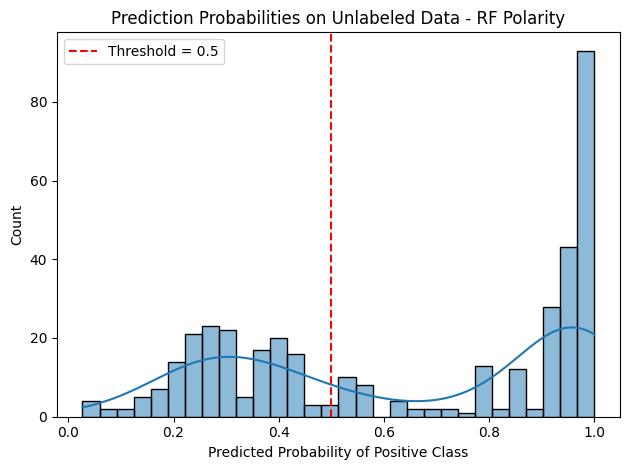

In [39]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data - RF Polarity")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
top_10 = high_conf.sort_values(by='predicted_proba', ascending=False).head(20)
print(top_10[['solvent', 'mx', 'predicted_proba']])

                    solvent     mx  predicted_proba
138  N, N-dimethylformamide   V2C1         1.000000
140    N-methyl pyrrolidone   V2C1         1.000000
87   N, N-dimethylformamide  Nb2C1         1.000000
192    N-methyl pyrrolidone  Mo2C1         1.000000
245    N-methyl pyrrolidone  Ti2C1         1.000000
246    N-methyl pyrrolidone  Ti2C1         1.000000
193    N-methyl pyrrolidone  Mo2C1         1.000000
243  N, N-dimethylformamide  Ti2C1         1.000000
352    N-methyl pyrrolidone   V4C3         0.999600
405    N-methyl pyrrolidone  Ta4C3         0.999600
404    N-methyl pyrrolidone  Ta4C3         0.999600
190  N, N-dimethylformamide  Mo2C1         0.999286
129                 ethanol   V2C1         0.999286
136      dimethyl sulfoxide   V2C1         0.999286
86       dimethyl sulfoxide  Nb2C1         0.999286
137      dimethyl sulfoxide   V2C1         0.999286
234                 ethanol  Ti2C1         0.999286
242      dimethyl sulfoxide  Ti2C1         0.999286
85       dim

In [41]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.1]
bottom_10 = low_conf.sort_values(by='predicted_proba', ascending=True).head(20)

print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):")
print(bottom_10[['mx', 'solvent', 'predicted_proba']])

MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):
       mx             solvent  predicted_proba
66  Ti3C2            p-Xylene         0.026923
74  Ti3C2       Chlorobenzene         0.043034
69  Ti3C2          Chloroform         0.051923
68  Ti3C2  Tetrachloromethane         0.056923
63  Ti3C2     Dichloromethane         0.061923
64  Ti3C2     tetrahydrofuran         0.070126


In [42]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    386.000000
mean       0.644406
std        0.321398
min        0.026923
25%        0.310000
50%        0.774655
75%        0.965852
max        1.000000
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)            6
Low (0.1–0.3)             82
Mid (0.3–0.5)             73
High (0.5–0.7)            28
Very High (0.7–0.9)       33
Extremely High (>0.9)    164
Name: count, dtype: int64


In [43]:
train_path = f"{drive_path}/master/code-data/training/polarity/"

In [44]:
df_unlabeled.to_csv(f"{train_path}/001_positive_vs_negative_predictions_on_unlabeled_rf_polarity.csv")
df_unlabeled.to_pickle(f"{train_path}/001_positive_vs_negative_predictions_on_unlabeled_rf_polarity.pkl")


                      Feature  Importance
42              boiling_point    0.176769
34                      xlogp    0.142321
4                          xn    0.107316
1                           p    0.090490
35                       tpsa    0.080092
3                          xd    0.063105
36                 complexity    0.059337
2                          xe    0.055678
33           molecular_weight    0.046321
38      h_bond_acceptor_count    0.044203
40           heavy_atom_count    0.029134
37         h_bond_donor_count    0.022392
0                      method    0.012567
41          atom_stereo_count    0.009384
11       plasmafrequency_x_oh    0.006783
10               alphaz_el_oh    0.005551
13  has_inversion_symmetry_oh    0.004555
12       plasmafrequency_y_oh    0.004251
29                alphaz_el_f    0.003982
39       rotatable_bond_count    0.003500
7                    ehull_oh    0.003468
23   has_inversion_symmetry_o    0.003467
26                    ehull_f    0

/tmp/ipython-input-45-4016910764.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


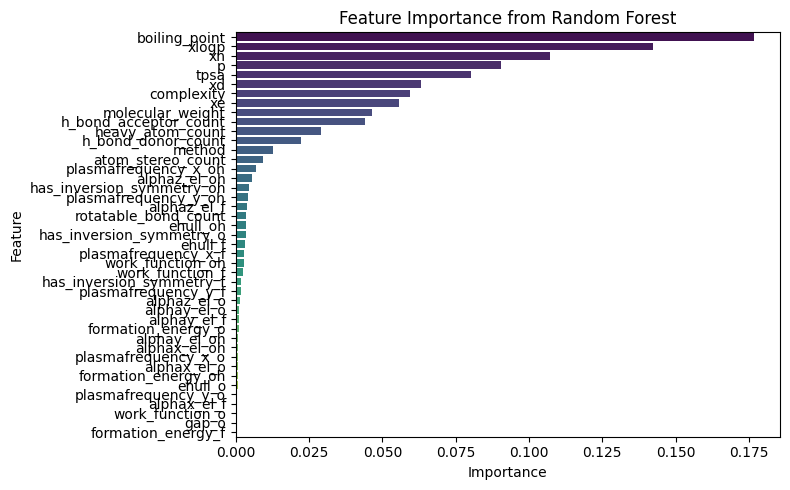

In [45]:
importances = clf.feature_importances_
feature_names = features

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

Top 10 Feature Importances:
                  Feature  Importance
42          boiling_point    0.176769
34                  xlogp    0.142321
4                      xn    0.107316
1                       p    0.090490
35                   tpsa    0.080092
3                      xd    0.063105
36             complexity    0.059337
2                      xe    0.055678
33       molecular_weight    0.046321
38  h_bond_acceptor_count    0.044203


/tmp/ipython-input-46-2139369391.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


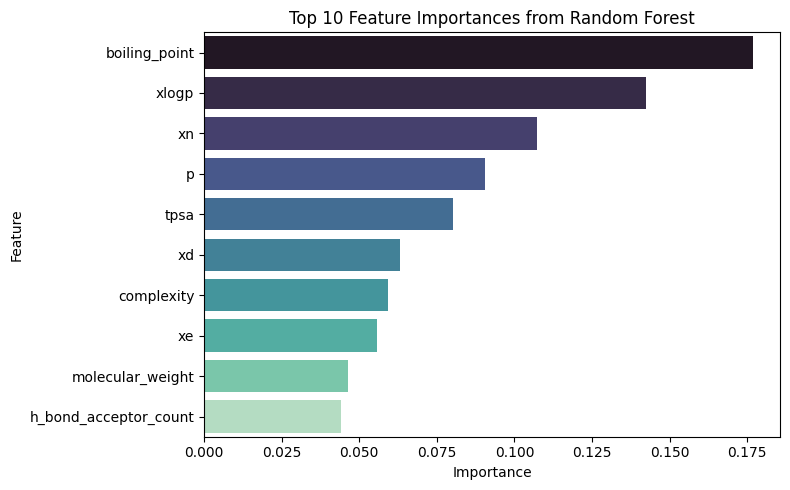

In [46]:

# Create and sort feature importance DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)  # Change to .head(15) for top 15

# Print top features
print("Top 10 Feature Importances:")
print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')
plt.title('Top 10 Feature Importances from Random Forest')
plt.tight_layout()
plt.show()